<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/machine_learning/blob/main/classes/class_march_24_gradient_descent/class_march_24_gradient_descents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table> 

# Gradiente descendente estocástico

In [ ]:
from sklearn.datasets import load_iris  

In [ ]:
iris = load_iris()

In [ ]:
X,y = load_iris(return_X_y = True) 

In [ ]:
X.shape

In [ ]:
y_setosa = (y==0) 

In [ ]:
X_sepal = X[:,(0,1)] 

In [ ]:
X_sepal.shape 

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
fig,ax = plt.subplots()

ax.scatter(X_sepal[:,0][y_setosa], X_sepal[:,1][y_setosa] )
ax.scatter(X_sepal[:,0][y_setosa==0], X_sepal[:,1][y_setosa==0] )

In [ ]:
from sklearn.linear_model import SGDClassifier 

In [ ]:
sgd_clf = SGDClassifier(max_iter = 5, tol = 1e-3, random_state = 42) 

In [ ]:
sgd_clf.fit(X_sepal, y_setosa) 

In [ ]:
b = sgd_clf.intercept_/ sgd_clf.coef_[0,1]  

In [ ]:
b 

In [ ]:
sgd_clf.coef_ 


In [ ]:
sgd_clf.coef_.shape 


In [ ]:
m = -sgd_clf.coef_[0,0]/sgd_clf.coef_[0,1]  

In [ ]:
m 

$$ w_{0} + w_{1}x_{1} + w_{2}x_{2} = 0 $$

$$ x_{2} = -\frac{w_{1}}{w_{2}}x_{1} - \frac{w_{0}}{w_{2}} $$

In [ ]:
sgd_clf = SGDClassifier(max_iter = 100, tol = 1e-5, random_state = 42) 
sgd_clf.fit(X_sepal, y_setosa) 
import numpy as np 
fig,ax = plt.subplots()

ax.scatter(X_sepal[:,0][y_setosa], X_sepal[:,1][y_setosa] )
ax.scatter(X_sepal[:,0][y_setosa==0], X_sepal[:,1][y_setosa==0] )
c,d = np.min(X[:,0]), np.max(X[:,0]) 

m = -sgd_clf.coef_[0,0]/sgd_clf.coef_[0,1]  

b = -sgd_clf.intercept_/ sgd_clf.coef_[0,1] 

ax.plot([c,d], [m*c + b, m*d+b]) 

# Gradiente descendente para clasificación como función de un solo atributo

In [ ]:
from sklearn.datasets import load_iris  
X,y = load_iris(return_X_y = True) 
y_setosa = (y==0) 
X_sepal = X[:,0] 
import matplotlib.pyplot as plt 
fig,ax = plt.subplots()

ax.scatter(X_sepal,y_setosa.ravel() )


In [ ]:
def cost(w0):
    y_pred = 1*(X_sepal<=w0)
    return (1/len(X_sepal)*np.sum((y_setosa - y_pred)**2))

In [ ]:
a,b = np.min(X_sepal), np.max(X_sepal) 

In [ ]:
W0 = np.linspace(a,b,400) 

In [ ]:
plt.plot(W0, [cost(w) for w in W0])

# The Normal Equation

Para encontrar el valor de $w$ que minimiza la función de costo, hay una solución de forma cerrada, en otras palabras, una ecuación matemática que da el resultado directamente.

Esto se llama **la ecuación normal**.



$$ \hat{\theta}  = (X^{T}X)^{-1} X^{T}y $$


En esta ecuación:

* $\hat{w}$ es el valor de $w$ que minimiza la función de costo. 

* $y$ es el vector de valores objetivo que contiene $y^{(1)}$ a $y^{(m)}$.

Generemos algunos datos de aspecto lineal para probar esta ecuación:

In [2]:
import numpy as np

np.random.seed(42) 

X1 = 2 * np.random.rand(100, 1)
y = 4 + 3 * X1 + np.random.randn(100, 1)

<img src = 'https://github.com/marco-canas/machine_learning/blob/main/classes/class_march_24_gradient_descent/figura_4_1.jpg?raw=true'>

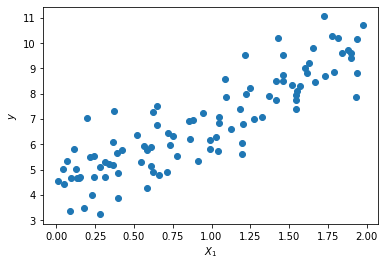

In [3]:
import matplotlib.pyplot as plt 

plt.scatter(X1,y)
plt.xlabel(r'$X_{1}$')
plt.ylabel(r'$y$')

plt.show() 

Ahora calculemos $\hat{w}$ usando la ecuación normal.

Usaremos la función `inv()` del módulo de álgebra lineal de NumPy (`np.linalg`) para calcular la inversa de una matriz, y el método `dot()` para la multiplicación de matrices:

In [5]:
X_b = np.c_[np.ones((100, 1)), X1] # add x0 = 1 to each instance

In [6]:
w_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

La función que usamos para generar los datos es $y = 4 + 3x + \text{ruido gaussiano}.$

Veamos qué encontró la ecuación:

In [7]:
w_best

array([[4.21509616],
       [2.77011339]])

Habríamos esperado $w_{0} = 4$ y $w_{1} = 3$ en lugar de $w_{0} = 4.215$ y $w_{1} = 2.770$.

Lo suficientemente cerca, pero el ruido hizo imposible recuperar los parámetros exactos de la función original.

Ahora podemos hacer predicciones usando $\hat{w}$

In [8]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(w_best)
y_predict

array([[4.21509616],
       [9.75532293]])

Tracemos las predicciones de este modelo:

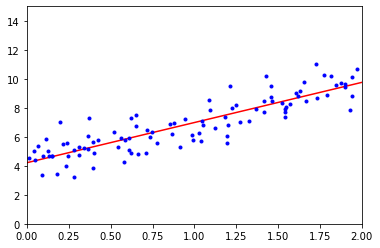

In [14]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X1, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Realizar una regresión lineal con Scikit-Learn es simple:

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X1, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [12]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

La clase `LinearRegression` se basa en la función `scipy.linalg.lstsq()` (el nombre significa "mínimos cuadrados"), a la que puede llamar directamente:

In [15]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

Esta función calcula $\hat{w}= X+y$, donde $X+$ es la pseudoinversa de $X$ (específicamente, la inversa de Moore-Penrose).

Puede usar `np.linalg.pinv()` para calcular el pseudoinverso directamente:

In [16]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

La pseudoinversa en sí se calcula usando una técnica de factorización de matriz estándar llamada Descomposición de valor singular (SVD) que puede descomponer la matriz del conjunto de entrenamiento X en la multiplicación de tres matrices $U \Sigma V$ (ver `numpy.linalg.svd()`).

El pseudoinverso se calcula como $X^{+} = V\Sigma^{+}U^{T}$.

Para calcular la matriz $\Sigma^{+}$, el algoritmo toma $\Sigma$ y establece en cero todos los valores menores que un pequeño valor de umbral, luego reemplaza todos los valores distintos de cero con su inversa y finalmente transpone la matriz resultado.

Este enfoque es más eficiente que calcular la Ecuación Normal, además maneja muy bien los casos límite: de hecho, la Ecuación Normal puede no funcionar si la matriz $X^{T}X$ no es invertible (es decir, singular), como si $ m < n$ o si algunas características son redundantes, pero la pseudoinversa siempre está definida.

## Computational Complexity

La ecuación normal calcula el inverso de $X^{T}X$, que es una matriz $(n + 1) \times (n + 1)$ (donde n es el número de características). 

La complejidad computacional de invertir una matriz de este tipo suele ser de $O(n^{2.4})$ a $O(n^{3})$, según la implementación.

En otras palabras, si duplica la cantidad de características, multiplica el tiempo de cálculo por aproximadamente $2^{2.4} = 5.3$ a $2^{3} = 8$.

El enfoque SVD utilizado por la clase LinearRegression de Scikit-Learn es aproximadamente $O(n^{2})$.

Si duplica la cantidad de características, multiplica el tiempo de cálculo por aproximadamente 4.

## ADVERTENCIA

Tanto la ecuación normal como el enfoque SVD se vuelven muy lentos cuando la cantidad de características aumenta (por ejemplo, 100,000).

En el lado positivo, ambos son lineales con respecto al número de instancias en el conjunto de entrenamiento (son $O(m)$), por lo que manejan grandes conjuntos de entrenamiento de manera eficiente, siempre que quepan en la memoria.

Además, una vez que haya entrenado su modelo de regresión lineal (usando la ecuación normal o cualquier otro algoritmo), las predicciones son muy rápidas: la complejidad computacional es lineal con respecto a la cantidad de instancias en las que desea hacer predicciones y la cantidad de características.

En otras palabras, hacer predicciones sobre el doble de instancias (o el doble de funciones) llevará aproximadamente el doble de tiempo.

Ahora veremos una forma muy diferente de entrenar un modelo de regresión lineal, que se adapta mejor a los casos en los que hay una gran cantidad de funciones o demasiadas instancias de entrenamiento para caber en la memoria.

## Descenso de gradiente

Page: 173

**Gradient Descent** es un algoritmo de optimización genérico capaz de encontrar soluciones óptimas a una amplia gama de problemas.

La idea general de **Gradient Descent** es ajustar los parámetros iterativamente para minimizar una **función de costo**.

Suponga que está perdido en las montañas en una densa niebla, y solo puede sentir la pendiente del suelo debajo de sus pies.

Una buena estrategia para llegar rápidamente al fondo del valle es descender en dirección a la pendiente más pronunciada.

Esto es exactamente lo que hace Gradient Descent:  

* mide el gradiente local de la función de error con respecto al vector de parámetros $\theta$, y va en la dirección del gradiente descendente.

Una vez que el gradiente es cero, ¡ha alcanzado un mínimo!

Concretamente, empiezas llenando $\theta$ con valores aleatorios (esto se llama inicialización aleatoria).

Luego lo mejora gradualmente, dando un pequeño paso a la vez, cada paso intentando disminuir la función de costo (por ejemplo, el MSE), hasta que el algoritmo converge a un mínimo.

<img src = 'https://github.com/marco-canas/machine_learning/blob/main/classes/class_march_24_gradient_descent/figura_4_3.jpg?raw=true'>

Un parámetro importante en Gradient Descent es el tamaño de los pasos, determinado por el hiperparámetro de tasa de aprendizaje (*learning rate*).

Si la tasa de aprendizaje es demasiado pequeña, el algoritmo tendrá que pasar por muchas iteraciones para converger, lo que llevará mucho tiempo.

<img src = 'https://github.com/marco-canas/machine_learning/blob/main/classes/class_march_24_gradient_descent/figura_4_4_learnig_rate_small.jpg?raw=true'>

Por otro lado, si la tasa de aprendizaje es demasiado alta, es posible que saltes al otro lado del valle y termines en el otro lado, posiblemente incluso más alto de lo que estabas antes.

Esto podría hacer que el algoritmo diverja, con valores cada vez mayores, y no pueda encontrar una buena solución.

<img src = 'https://github.com/marco-canas/machine_learning/blob/main/classes/class_march_24_gradient_descent/figura_4_5_learning_rate_large.jpg?raw=true'>

Finalmente, no todas las **funciones de costos** se ven como tazones regulares y agradables.

Puede haber agujeros, crestas, mesetas y todo tipo de terrenos irregulares, lo que dificulta al mínimo la convergencia.

La Figura 4-6 muestra los dos desafíos principales con Gradient Descent.

<img src = 'https://github.com/marco-canas/machine_learning/blob/main/classes/class_march_24_gradient_descent/figura_4_6_global_minimum.jpg?raw=true'>

Si la inicialización aleatoria inicia el algoritmo a la izquierda, convergerá a un mínimo local, que no es tan bueno como el mínimo global.

Si comienza a la derecha, tomará mucho tiempo cruzar la meseta.

Y si te detienes demasiado pronto, nunca alcanzarás el mínimo global.

Afortunadamente, la función de costo de MSE para un modelo de regresión lineal resulta ser una función convexa, lo que significa que si selecciona dos puntos en la curva, el segmento de línea que los une nunca cruza la curva.

Esto implica que no hay mínimos locales, solo un **mínimo global**.

También es una función continua con una pendiente que nunca cambia abruptamente.

Estos dos hechos tienen una gran consecuencia: se garantiza que Gradient Descent se acerque arbitrariamente al mínimo global (si espera lo suficiente y si la tasa de aprendizaje no es demasiado alta).

De hecho, la función de costo tiene forma de cuenco, pero puede ser un cuenco alargado si las características tienen escalas muy diferentes.

La figura 4-7 muestra el descenso de gradiente en un conjunto de entrenamiento donde las funciones 1 y 2 tienen la misma escala (a la izquierda) y en un conjunto de entrenamiento donde la función 1 tiene valores mucho más pequeños que la función 2 (a la derecha).

<img src = 'https://github.com/marco-canas/machine_learning/blob/main/classes/class_march_24_gradient_descent/figura_4_7.jpg?raw=true'>

Como puedes ver, a la izquierda el algoritmo de Descenso de Gradiente va directo hacia el mínimo, alcanzándolo rápidamente, mientras que a la derecha primero va en una dirección casi ortogonal a la dirección del mínimo global, y termina con una marcha larga por un valle casi plano.

Eventualmente alcanzará el mínimo, pero tomará mucho tiempo.

## WARNING

Al usar Gradient Descent, debe asegurarse de que todas las funciones tengan una escala similar (p. ej., usando la clase StandardScaler de Scikit-Learn), o de lo contrario tardará mucho más en converger.

Este diagrama también ilustra el hecho de que entrenar un modelo significa buscar una combinación de parámetros del modelo que minimice una **función de costo** (sobre el conjunto de entrenamiento).

Es una búsqueda en el espacio de parámetros del modelo: cuantos más parámetros tiene un modelo, más dimensiones tiene este espacio, y más difícil es la búsqueda: buscar una aguja en un pajar de 300 dimensiones es mucho más complicado que en 3 dimensiones.

Afortunadamente, dado que la función de costo es convexa en el caso de la regresión lineal, la aguja simplemente está en el fondo del recipiente.

## Descenso de gradiente por lotes

Para implementar Gradient Descent, debe calcular el gradiente de la función de costo con respecto a cada parámetro del modelo $\theta$.

En otras palabras, debe calcular cuánto cambiará la función de costo si cambia $\theta$ solo un poco.

A esto se le llama derivada parcial.

Es como preguntar "¿Cuál es la pendiente de la montaña bajo mis pies si miro hacia el este?" y luego haciendo la misma pregunta mirando hacia el norte (y así sucesivamente para todas las demás dimensiones, si puedes imaginar un universo con más de tres dimensiones).

La ecuación 4-5 calcula la derivada parcial de la función de costo con respecto al parámetro $\theta$, $\frac{\partial}{\partial \theta_{j}} MSE(\theta)$ anotado:

$$ \frac{\partial}{\partial \theta_{j}} MSE(\theta) = \frac{2}{m} \sum_{i = 1}^{m} \left( \theta^{T}x^{(i)} - y^{(i)}\right)x_{j}^{(i)}. $$

En lugar de calcular estas derivadas parciales individualmente, puede usar la Ecuación 4-6 para calcularlas todas de una sola vez. 

El vector gradiente, anotado $\nabla_{\theta} MSE(\theta)$, contiene todas las derivadas parciales de la función de costo (una para cada parámetro del modelo).

$$ \nabla_{\theta}MSE(\theta) = \begin{pmatrix}  \frac{\partial}{\partial \theta_{0}} MSE(\theta) \\ \frac{\partial}{\partial \theta_{1}} MSE(\theta) \\ \vdots \\ \frac{\partial}{\partial \theta_{n}} MSE(\theta) \end{pmatrix} = \frac{2}{m}X^{T}(X\theta - y)   $$

Una vez que tenga el vector de gradiente, que apunta cuesta arriba, simplemente vaya en la dirección opuesta para ir cuesta abajo.

This means subtracting $\nabla MSE(\theta)$ from $\theta$. 

Aquí es donde entra en juego la tasa de aprendizaje $\eta$: multiplique el vector gradiente por $\eta$ para determinar el tamaño del paso cuesta abajo (Ecuación 4-7).

$$ \theta^{\text{next step}} = \theta - \eta \nabla_{\theta} MSE(\theta) $$

Veamos una implementación rápida de este algoritmo:

In [17]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

¡Eso no fue demasiado difícil! Veamos el theta resultante:

In [18]:
theta

array([[4.21509616],
       [2.77011339]])

¡Oye, eso es exactamente lo que encontró la ecuación normal! Descenso de gradiente funcionó perfectamente.

Pero, ¿y si hubieras utilizado una tasa de aprendizaje eta diferente?

La siguiente figura muestra los primeros 10 pasos de Gradient Descent utilizando tres tasas de aprendizaje diferentes (la línea discontinua representa el punto de partida).

<img src = 'https://github.com/marco-canas/machine_learning/blob/main/classes/class_march_24_gradient_descent/figura_4_8.jpg?raw=true'>

A la izquierda, la tasa de aprendizaje es demasiado baja: el algoritmo finalmente llegará a la solución, pero llevará mucho tiempo. 

En el medio, la tasa de aprendizaje parece bastante buena: en solo unas pocas iteraciones, ya ha convergido a la solución. 

A la derecha, la tasa de aprendizaje es demasiado alta: el algoritmo diverge, salta por todos lados y, de hecho, se aleja más y más de la solución en cada paso.

To find a good learning rate, you can use grid search (see Chapter 2). 

However,
you may want to limit the number of iterations so that grid search can eliminate
models that take too long to converge.

You may wonder how to set the number of iterations. 

If it is too low, you will still be far away from the optimal solution when the algorithm stops; but if it is too high, you will waste time while the model parameters do not change
anymore. 

A simple solution is to set a very large number of iterations but to interrupt the algorithm when the gradient vector becomes tiny—that is, when its norm becomes smaller than a tiny number $ϵ$ (called the tolerance)—because this happens when Gradient Descent has (almost) reached the minimum.

### CONVERGENCE RATE

When the cost function is convex and its slope does not change abruptly (as is the case for the MSE cost function), Batch Gradient Descent with a fixed learning rate will eventually converge to the optimal solution, but you may have to wait a while: it can take $O(1/ϵ)$ iterations to reach the optimum within a range of $ϵ$, depending on the shape of the cost function. 

If you divide the tolerance by 10 to have a more precise solution, then the algorithm may have to run about 10 times longer.

## Stochastic Gradient Descent

The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow
when the training set is large. 

At the opposite extreme, Stochastic Gradient Descent picks a random instance in the training set at every step and computes the gradients based only on that single instance. 

Obviously, working on a single instance at a time makes the algorithm much faster because it has very little data to manipulate at every iteration. 

It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration (Stochastic GD can be implemented as an out-of-core algorithm; see Chapter 1).

On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. 

Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down (see Figure 4-9). 

So once the algorithm stops, the final parameter values are good, but not optimal.

<img src = 'https://github.com/marco-canas/machine_learning/blob/main/classes/class_march_24_gradient_descent/figura_4_9.jpg?raw=true'>

Cuando la función de costo es muy irregular (como en la Figura 4-6), esto puede ayudar al algoritmo a saltar fuera de los mínimos locales, por lo que Stochastic Gradient Descent tiene más posibilidades de encontrar el mínimo global que Batch Gradient Descent.

Therefore, randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. 

One solution to this dilemma is to gradually reduce the learning rate. 

The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum. 

This process is akin to simulated annealing, an algorithm inspired from the process in
metallurgy of annealing, where molten metal is slowly cooled down. 

The function that determines the learning rate at each iteration is called the learning
schedule. 

If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. 

If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early.

Este código implementa Stochastic Gradient Descent utilizando un programa de aprendizaje simple:

In [19]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

## Referencias  

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html